Lineer Regresyon'da EKK Yöntemi için Varsayımlar
----
1-Doğrusallık (Modelin katsayılarının doğrusallığı)

2-Normallik (Modeldeki hataların normal dağılım göstermesi)

3-Otokorelasyon varsayımı (Hatalar arasında otokorelasyon yoktur testi)

4-Sabit varyans varsayımı (Her bir gözlem için hata varyanslarının sabit olması)

5-Çoklu doğrusal bağıntı varsayımı (Bağımsız değişkenler arasında çoklu doğ. bağ. probleminin olmaması)

6-Gözlem sayısının bağımsız değişken sayısından fazla olması (n > k)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### Doğrusallık Varsayımı

In [2]:
df_ = pd.read_csv("C:/Users/htcso/OneDrive/Masaüstü/pythonProject/datasets/Adversiting.csv")
df = df_.copy()
df.head()
# Reklam Harcamaları ve Satış Miktarları

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


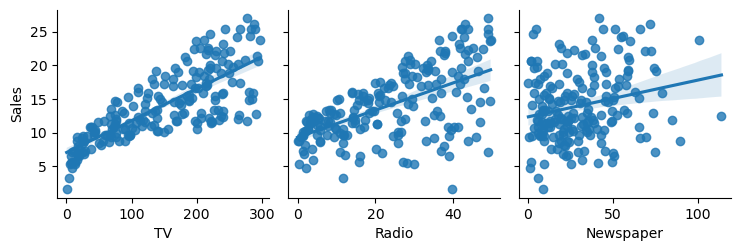

In [3]:
sns.pairplot(data=df, y_vars="Sales", x_vars=["TV", "Radio", "Newspaper"], kind="reg")
plt.show()

In [4]:
y = df["Sales"]
X = df[["TV", "Radio", "Newspaper"]]

In [5]:
const = sm.add_constant(X)
model = sm.OLS(y, const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           1.58e-96
Time:                        09:20:44   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# Newspaper değişkeninin grafikten ve p değerinden de görüleceği üzere anlamlı olmadığı söylenebilir.

In [7]:
y = df["Sales"]
X = df[["TV", "Radio"]]

const = sm.add_constant(X)
model = sm.OLS(y, const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           4.83e-98
Time:                        09:20:44   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Normallik Varsayımı

In [8]:
model.resid  # ghata terimleri

0      1.544535
1     -1.945362
2     -3.037018
3      0.882884
4     -0.323908
         ...   
195    2.235488
196    1.547625
197    0.031952
198    1.707077
199   -1.757543
Length: 200, dtype: float64

In [9]:
# Model özetindeki Prob(JB) değerinin 0.05'ten büyük olması hataların normal dağıldığını gösterir.
# Ancak aykırı gözlemlere ve gözlem sayısının az olduğu durumlara karşı hassas olduğundan bu sonuç yanıltıcı olabilir.
# Modelimizcdeki Prob(JB):	5.19e-33. Yani hatalar normal dağılım göstermemektedir.
# Normal dağılım varsayımı için diğer yöntemleri de deneyelim.

C:\Users\htcso\AppData\Local\Temp\ipykernel_3124\4034440334.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model.resid, kde=True)


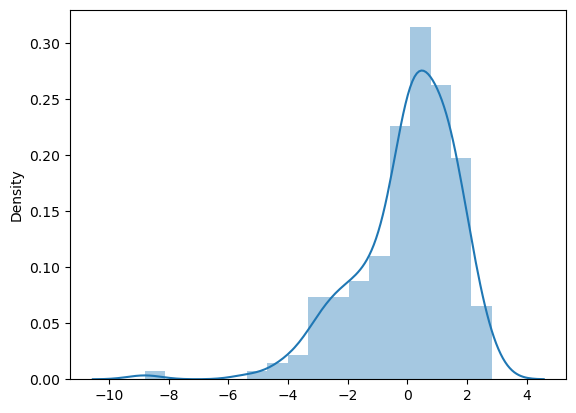

In [10]:
sns.distplot(model.resid, kde=True)
plt.show()

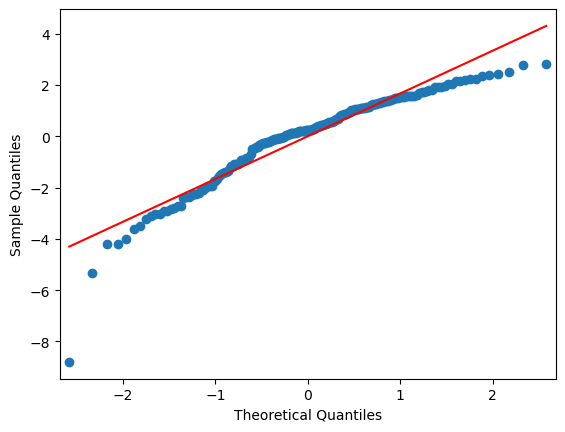

In [11]:
sm.qqplot(model.resid, line="s")
plt.show()

In [12]:
# Grafiklere göre hataların normal dağılım gösterdiğini söyleyebiliriz.

### Otokorelasyon Varsayımı
Zaman serisinde; değişkendeki her bir gözlemin birbiriyle olan ilişkisi gözlemlenebilir.

Regresyonda; hata terimlerinin otokorelasyonu (Otokorelasyon olmamasını, hataların rassal olarak ortaya çıkmış olmasını bekleriz.)

In [13]:
err = model.resid

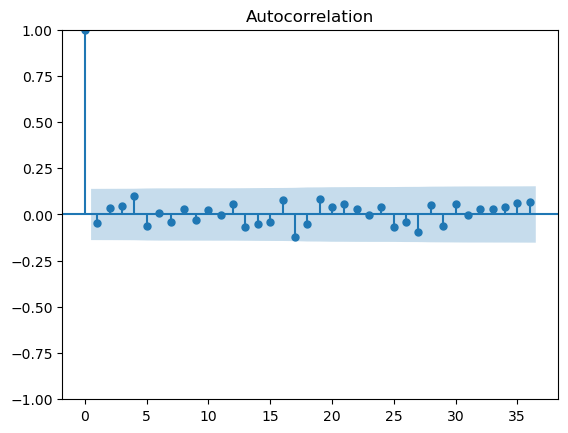

In [14]:
# 1. Yöntem: Korelogram
# Çizgiler güven aralığının içinde olmalı.

sm.graphics.tsa.plot_acf(err, lags=36)
plt.show()

In [15]:
# Tüm çizgiler güven aralığının içinde. Otokorelasyon problemi görülmemektedir.

In [16]:
# 2. Yöntem: Durbin Watson Testi
# Model özetinde Durbin Watson değeri 1.5 ile 2.5 arrasında ise otokorelasyon yoktur.

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           4.83e-98
Time:                        09:20:46   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Durbin-Watson:	2.081 --> Otokorelasyon yoktur.

In [19]:
# Durbin-Watson 1.5 ile 2.5 arasında çıkmasaydı LM Testi
# LM Testi
# H0: Otokorelasyon yoktur.
# H1: Otokorelasyon vardır.

In [20]:
import statsmodels.stats.diagnostic as smd

In [21]:
lm = smd.acorr_breusch_godfrey(model, nlags=2)
lm

(0.680417447402526, 0.7116217749296596, 0.332835842179411, 0.7172943226656876)

In [22]:
# lm[1] = 0.7116217749296596 > 0.05 H0 Reddedilemez. Otokorelasyon yoktur.

#### Otokorelasyon olması durumunda
**Newey–West (HAC) Yöntemi** kullanılabilir. Otokorelasyonu ortadan kaldırmaz ancak otokorelasyonun etkisini ortadan kaldırır. Bunu parametrelerin standart hatalarına bir düzeltme yaparak gerçekleştirir.

In [23]:
# Verilerimizde otokorelasyon olduğunu varsayarak Newey–West (HAC) Yöntemi uygulayalım.

In [24]:
model2 = sm.OLS(y, X).fit(cov_type="HAC", cov_kwds={"maxlags": 3})
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                          1.381e+04
Date:                Mon, 10 Apr 2023   Prob (F-statistic):                   2.41e-213
Time:                        09:20:46   Log-Likelihood:                         -426.71
No. Observations:                 200   AIC:                                      857.4
Df Residuals:                     198   BIC:                                      864.0
Df Model:                           2                                                  
Covariance Type:                  HAC                                                  
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0548      0.001     41.245      0.000       0.052       0.057
Radio          0.2356      0.008     29.176      0.000       0.220       0.251
==============================================================================
Omnibus:                        6.047   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                8.829
Skew:                          -0.112   Prob(JB):                       0.0121
Kurtosis:                       4.005   Cond. No.                         9.37
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 3 lags and without small sample correction
"""

### Sabit Varyans Varsayımı
H0: Hata terimlerinin varyansı eşittir.

H1: Hata terimlerinin varyansı değişkendir.

In [25]:
# 1. Yöntem: White Testi

white_test = smd.het_white(model.resid, model.model.exog)
white_test

(64.5239676780375,
 1.4067931342831405e-12,
 18.479504477649204,
 5.401631305046166e-15)

In [26]:
# white_test[-1] = 5.401631305046166e-15 < 0.05 olduğundan H0 reddedilir.

In [27]:
# 2. Yöntem: Breusch Pagan Testi

BP_test = smd.het_breuschpagan(model.resid, model.model.exog)
BP_test

(4.809299865939409, 0.09029710011529549, 2.426939585081023, 0.0909429273412957)

In [28]:
# BP_test[-1] = 0.0909429273412957 > 0.05 olduğundan H0 reddedilemez.

In [29]:
# İki test farklı sonuçlar vermektedir. Normallik varsayımı sağlanıyorsa Breusch Pagan Testi daha doğru sonuç veremektedir.
# Normallik varsayımı sağlanmıyor ancak merkezi limit teoremine dayanarak test yapıyorsak White Testi daha doğrudur.

#### Sabit varyansı sağlanmadığı durumda
Log-Model dönüşümü kullanılabilir. Bağımlı ve bağımsız değişkenlerin logaritması alınarak model kurulur.

ln(Yi) = B0 + B1*ln(Xi)

In [32]:
data_log = pd.read_excel("C:/Users/htcso/OneDrive/Masaüstü/pythonProject/datasets/log_model.xlsx")
data_log.head()

,Y,X
0,5.2,100
1,5.1,100
2,5.3,100
3,5.2,100
4,5.4,100


In [33]:
y = data_log["Y"]
x = data_log["X"]

const = sm.add_constant(x)
model = sm.OLS(y, const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     108.6
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           3.86e-11
Time:                        09:33:25   Log-Likelihood:                -69.264
No. Observations:                  30   AIC:                             142.5
Df Residuals:                      28   BIC:                             145.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7933      1.079      0.735      0.468      -1.417       3.004
X              0.0339      0.003     10.419      0.000       0.027       0.041
==============================================================================
Omnibus:                       30.108   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.764
Skew:                           2.004   Prob(JB):                     1.76e-18
Kurtosis:                      10.025   Cond. No.                         778.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# sabit varyans testi

white_test = smd.het_white(model.resid, model.model.exog)
print(white_test)

bpt = smd.het_breuschpagan(model.resid, model.model.exog)
print(bpt)

(7.101394954910178, 0.028704611850957604, 4.186666904054256, 0.02607863875518798)
(4.441885848078928, 0.03506749133320195, 4.866274679223998, 0.03576097948546619)


In [36]:
# white_test[-1] = 0.02607863875518798 < 0.05 --> H0 Reddedilir. Varyanslar değişkendir.
# bpt[-1] = 0.03576097948546619 < 0.05 --> H0 Reddedilir. Varyanslar değişkendir.

In [38]:
import numpy as np

y = np.log(data_log["Y"])
x = np.log(data_log["X"])

const = sm.add_constant(x)
model = sm.OLS(y, const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     204.9
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           2.09e-14
Time:                        09:39:33   Log-Likelihood:                 12.674
No. Observations:                  30   AIC:                            -21.35
Df Residuals:                      28   BIC:                            -18.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9118      0.295     -6.484      0.000      -2.516      -1.308
X              0.7548      0.053     14.315      0.000       0.647       0.863
==============================================================================
Omnibus:                       14.888   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.929
Skew:                           1.311   Prob(JB):                     0.000211
Kurtosis:                       5.582   Cond. No.                         56.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
white_test = smd.het_white(model.resid, model.model.exog)
print(white_test)

bpt = smd.het_breuschpagan(model.resid, model.model.exog)
print(bpt)

(5.355370157510736, 0.0687220563084537, 2.9336004471752455, 0.07032570666146531)
(2.6379691721564846, 0.10433683974726392, 2.6994756816522054, 0.11156580270896839)


In [40]:
# white_test[-1] = 0.07032570666146531 > 0.05 --> H0 Reddedilemez. Sabit varyans varsayımı geçerlidir.
# bpt[-1] = 00.11156580270896839 > 0.05 --> H0 Reddedilemez. Sabit varyans varsayımı geçerlidir.

### Çoklu Doğrusal Bağlantı
Modelde çoklu dorğusal bağlantı probleminin olmamasını bekleriz. Modeldeki bağımsız değişkenlerin herhangi ikisi ya da daha fazlası arasında bir ilişki varsa, çoklu doğrusal bağlantı problemi vardır. Bu durum değişkenin rastgele ortaya çıkmadığını gösterir ve sonuçları yanıltır. Bir modelde parametreler anlamsız fakat model anlamlı çıkarsa, ilk şüphelenilmesi gereken ÇDB probleminin var olup olmadığıdır.

**Kontrol yöntemleri:**

- Korelasyon matrisi
- Vif testi (>10 ise ÇDB problemi vardır. Örneklem sayısı azsa eşik değer 5 olabilir.)

In [42]:
df = pd.read_csv("C:/Users/htcso/OneDrive/Masaüstü/pythonProject/datasets/Marketing_Data.csv")
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [43]:
y = df["sales"]
X = df[["youtube", "facebook", "newspaper"]]

const = sm.add_constant(X)
model = sm.OLS(y, const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     503.7
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           2.09e-83
Time:                        10:29:34   Log-Likelihood:                -359.99
No. Observations:                 171   AIC:                             728.0
Df Residuals:                     167   BIC:                             740.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5059      0.400      8.772      0.000       2.717       4.295
youtube        0.0452      0.002     29.830      0.000       0.042       0.048
facebook       0.1884      0.009     20.895      0.000       0.171       0.206
newspaper      0.0043      0.007      0.658      0.511      -0.009       0.017
==============================================================================
Omnibus:                       57.934   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.792
Skew:                          -1.388   Prob(JB):                     4.47e-36
Kurtosis:                       6.891   Cond. No.                         544.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

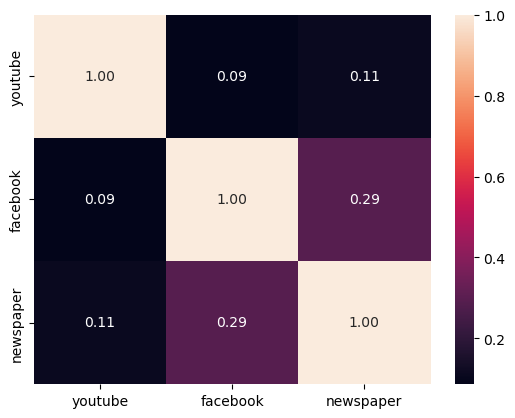

In [44]:
corr = X.corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

In [46]:
# Vif testi

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vars"] = X.columns
vif["VIF"] = [variance_inflation_factor(const.values, i+1) for i in range(X.shape[1])]
vif

,vars,VIF
0,youtube,1.015706
1,facebook,1.097761
2,newspaper,1.103072


In [47]:
# 10'dan ya da 5'ten büyük değer yoktur.

#### ÇDB problemi olsaydı
-Değişken dışlama : Yüksek vif değerli değişken verisetinden sırasıyla çıkarılarak tekrar model kurulur ve tekrar vif değerlerine bakılır. (Tüm yüksek vif değerli değişkenler bir anda çıkarılmamalı.)

-Temel bileşen analizi.